Floats and fixed point focus on algebraic properties rather than analytic ones. 
This is somewhat understandable. The algerbaic properties of addition make them easier to implement using discrete circuitry

However there are bad aspects.
A lesson of numerical analysis:
- use chebyshev points and chebyshev functions
A lesson of modern mathemtics
- look at functions, not objects

`id` is not cleanly representable.
`comp` is not cleanly representable.

When we need to flip into statistical fields or quantum fields, now the range of the function becomes part of the domain of the distrbution.

Float8 makes this more intuitive. ~256 grid points in the range feels very discrete.

Visual: a grid of chebyshev points.




domain and codomain are the input and output shapes.


In [ ]:
class Chebfun():
    coeffs:

https://en.wikipedia.org/wiki/Chebyshev_nodes

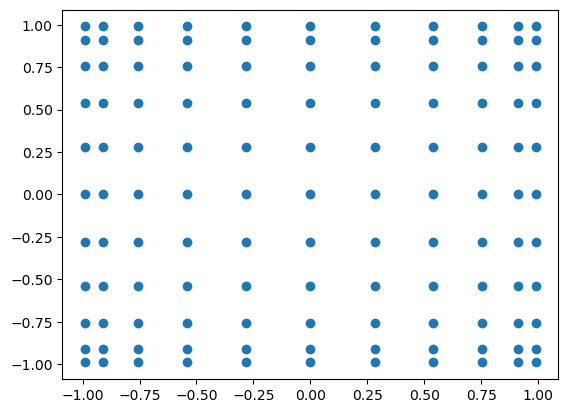

In [31]:
import numpy as np
import numpy.polynomial.chebyshev as cheb

N = 11
z = np.zeros((N,N))
xs = cheb.chebpts1(N).reshape((-1,1)) + z
ys = cheb.chebpts1(N).reshape((1,-1)) + z

import matplotlib.pyplot as plt
plt.scatter(xs,ys)



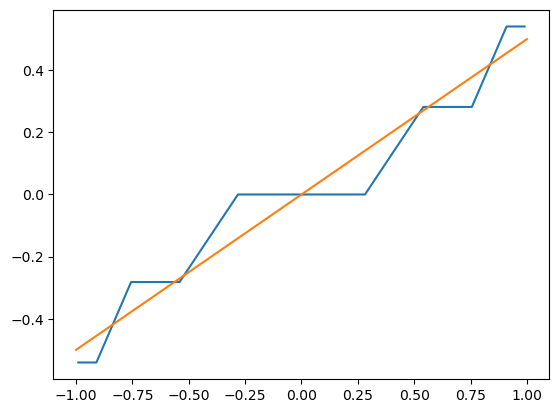

In [ ]:
def chebround(xs, n):
    return np.rint((n / np.pi)*np.arccos(-xs) - 1/2).astype(int)
chebround(-0.5, N) 
assert np.all(chebround(cheb.chebpts1(N), N) == np.arange(N))
assert np.all(chebround(cheb.chebpts1(N)+0.01, N) == np.arange(N))
assert np.all(chebround(cheb.chebpts1(N)-0.01, N) == np.arange(N))

def id_(N):
    return np.arange(N)
def comp(f,g):
    return f[g]

comp(id_(N), id_(N))

def from_fun(f, N):
    return chebround(f(cheb.chebpts1(N)), N)

from_fun(lambda x: x/2, N)
def chebto_num(f, N):
    xs = cheb.chebpts1(N)
    ys = cheb.chebpts1(N)[f]
    return xs,ys

def add(f,g):
    cpoints = cheb.chebpts(N)
    return chebround(cpoints[f] + cpoints[g], N)

fig = plt.figure()
halve = from_fun(lambda x: x/2, N)
xs,ys = chebto_num(halve, N)
plt.plot(xs,ys)
xs = np.linspace(-1,1,100)
plt.plot(xs, xs/2)

#plt.plot(add(halve,halve)